In [1]:
# !pip install matplotlib

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Load Data

In [3]:
with open('companies.pkl', 'rb') as file:
    df_companies = pickle.load(file)

df_companies.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
with open('piotroskiScores.pkl', 'rb') as file:
    df_piotroskiScores = pickle.load(file).reset_index()

df_piotroskiScores.head()

,Date,ROA,CFO,Delta ROA,Quality of Earnings,Delta Leverage,Delta Liquidity,New Equity,Gross Margin,Asset Turnover,Piotroski Score,Ticker
0,2022-12-31,1,1,0,1,0,0,1,0,0,4,MMM
1,2023-03-31,1,1,1,1,1,0,1,0,0,6,MMM
2,2023-06-30,0,1,0,1,1,1,1,1,0,6,MMM
3,2023-09-30,0,1,1,1,1,0,1,1,0,6,MMM
4,2022-12-31,0,1,0,1,0,1,1,1,1,6,AOS


# GICS Sector Averages

In [5]:
# Merging the Piotroski scores with the company details
merged_data = pd.merge(df_companies, df_piotroskiScores, left_on='Symbol', right_on='Ticker')

# Calculating the average Piotroski score for each sector
sector_wise_scores = merged_data.groupby('GICS Sector')['Piotroski Score'].mean().sort_values(ascending=False)

# Displaying the average Piotroski score per sector
sector_wise_scores


GICS Sector
Consumer Staples          6.177778
Industrials               6.137457
Consumer Discretionary    6.057592
Financials                6.042105
Energy                    6.000000
Information Technology    5.978070
Health Care               5.888889
Materials                 5.886957
Communication Services    5.805556
Utilities                 5.733333
Real Estate               5.693548
Name: Piotroski Score, dtype: float64

In [6]:
# Convert 'Date' to datetime for proper sorting and analysis
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Identify a representative date in 2023
dates_2023 = merged_data[merged_data['Date'].dt.year == 2023]['Date'].unique()
sector_scores_2023 = {}
for date in dates_2023:
    temp_data = merged_data[merged_data['Date'] == date]
    if temp_data['GICS Sector'].nunique() == merged_data['GICS Sector'].nunique():
        sector_scores_2023[date] = temp_data.groupby('GICS Sector')['Piotroski Score'].mean()

representative_date_2023 = max(sector_scores_2023, key=lambda k: len(sector_scores_2023[k]))

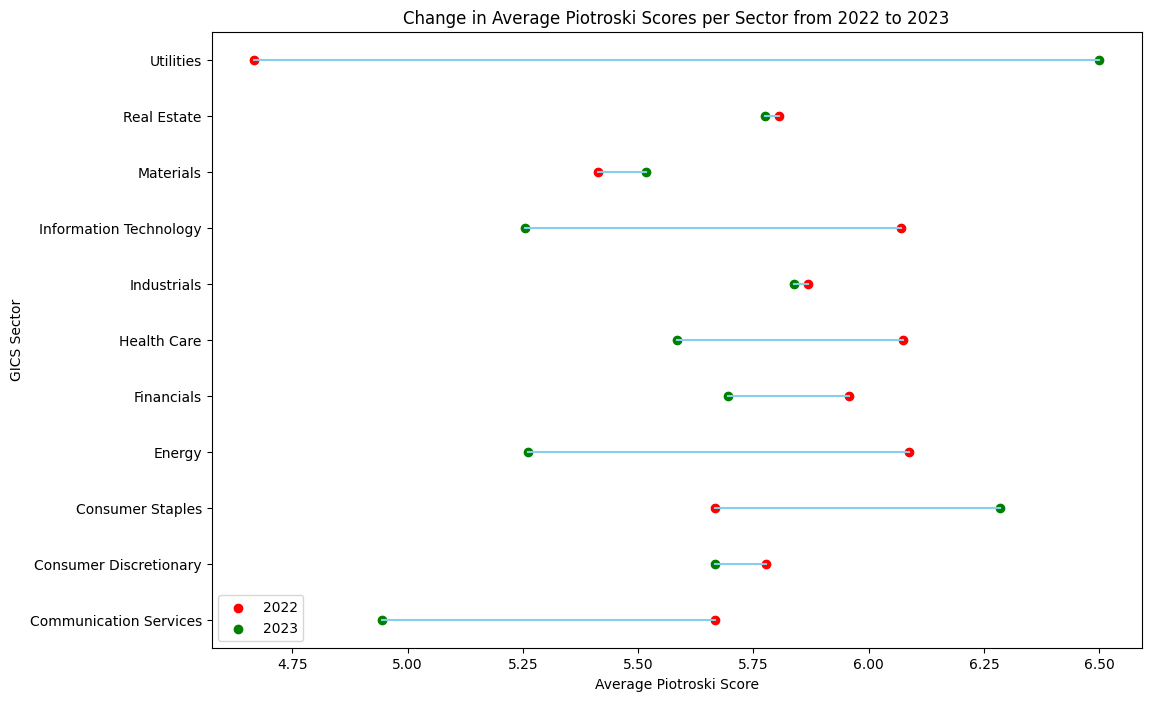

In [7]:
# Calculate the average Piotroski score for each sector on 2022-12-31 and the representative date in 2023
start_date_data = merged_data[merged_data['Date'] == '2022-12-31']
latest_date_data = merged_data[merged_data['Date'] == representative_date_2023]
sector_scores_start = start_date_data.groupby('GICS Sector')['Piotroski Score'].mean()
sector_scores_latest = latest_date_data.groupby('GICS Sector')['Piotroski Score'].mean()

# Merging these into a single DataFrame for plotting
sector_score_changes = pd.DataFrame({'Start': sector_scores_start, 'Latest': sector_scores_latest}).reset_index()

# Dropping rows with NaN values
sector_score_changes.dropna(inplace=True)

# Plotting the dumbbell plot for sectors where we have complete data
plt.figure(figsize=(12, 8))
for index, row in sector_score_changes.iterrows():
    plt.plot([row['Start'], row['Latest']], 
             [row['GICS Sector'], row['GICS Sector']], '-', color='skyblue')
    plt.scatter(row['Start'], row['GICS Sector'], color='red', label='2022' if index == 0 else "")
    plt.scatter(row['Latest'], row['GICS Sector'], color='green', label='2023' if index == 0 else "")

plt.title('Change in Average Piotroski Scores per Sector from 2022 to 2023')
plt.xlabel('Average Piotroski Score')
plt.ylabel('GICS Sector')
plt.legend()
plt.show()

In [10]:
high_score_stocks_new = merged_data[merged_data['Piotroski Score'] >= 7]

# Displaying a few of these high-score stocks
high_score_stocks_sample_new = high_score_stocks_new[['Symbol', 'Security', 'GICS Sector', 'Piotroski Score', 'Date']]
high_score_stocks_sample_new


,Symbol,Security,GICS Sector,Piotroski Score,Date
5,AOS,A. O. Smith,Industrials,8,2023-03-31
6,AOS,A. O. Smith,Industrials,7,2023-06-30
11,ABBV,AbbVie,Health Care,8,2022-12-31
13,ABBV,AbbVie,Health Care,8,2023-06-30
14,ACN,Accenture,Information Technology,8,2022-11-30
...,...,...,...,...,...
1665,YUM,Yum! Brands,Consumer Discretionary,7,2023-06-30
1667,ZBRA,Zebra Technologies,Information Technology,8,2022-12-31
1673,ZBH,Zimmer Biomet,Health Care,7,2023-06-30
1676,ZTS,Zoetis,Health Care,7,2023-03-31
